# 🍷 Wine Quality Regression Tutorial

## **Industrial Quality Control with Continuous Scoring**

### **Main Goal:**
Learn to predict wine quality as continuous scores using regression techniques, demonstrating how machine learning can provide precise, nuanced quality assessments for industrial quality control processes.

### **Key Learning Objectives:**
- **Continuous Quality Assessment**: Predict precise quality scores (not just discrete grades)
- **Regression Modeling**: Apply neural networks and classical algorithms for regression
- **Uncertainty Quantification**: Provide confidence intervals for quality predictions
- **Industrial Applications**: Apply to manufacturing processes requiring precise measurements
- **Performance Optimization**: Handle regression-specific challenges and metrics

### **Industrial Relevance:**
Apply to **precise quality scoring**, **process control optimization**, **continuous monitoring systems**, and **quality assurance** where exact measurements matter more than categories.

### **Interactive Features:**
🎮 Multi-model regression comparison | 📊 Residual analysis | ⚡ Prediction intervals | 🔬 Uncertainty estimation

**Dataset**: Wine Quality Dataset with 11 physicochemical features predicting continuous quality scores

**Regression vs Classification:**
- **Classification**: Discrete quality grades (3, 4, 5, 6, 7, 8, 9)
- **Regression**: Continuous quality scores (3.2, 5.7, 6.8, 7.3, etc.)

---

## 1. Import Required Libraries

We'll use comprehensive ML libraries for this regression tutorial, including PyTorch for neural networks and scikit-learn for traditional regression models.

In [11]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from scipy import stats
from IPython.display import display
import ipywidgets as widgets
from ipywidgets import interact, interactive
import warnings
warnings.filterwarnings('ignore')

# Try to import XGBoost
try:
    import xgboost as xgb
    XGBOOST_AVAILABLE = True
except ImportError:
    XGBOOST_AVAILABLE = False
    print("XGBoost not available. Install with: pip install xgboost")

plt.style.use('seaborn-v0_8')
np.random.seed(42)
torch.manual_seed(42)
%matplotlib widget

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")
print(f"PyTorch version: {torch.__version__}")
print(f"Available for regression: Neural Networks, Random Forest, Linear Models, SVR{',' + ' XGBoost' if XGBOOST_AVAILABLE else ''}")

Using device: cpu
PyTorch version: 2.4.1+cpu
Available for regression: Neural Networks, Random Forest, Linear Models, SVR, XGBoost


## 2. Load and Explore the Wine Quality Dataset

Let's load the wine quality dataset and treat quality as a continuous variable for regression analysis.

Wine Quality Regression Dataset Overview
Dataset shape: (1200, 12)
Features: ['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar', 'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density', 'pH', 'sulphates', 'alcohol']
Target: quality (continuous)
Quality range: 3.00 - 9.00
Quality mean: 6.50 ± 1.66

First 10 quality scores (showing continuous values):
[4.98, 6.7, 6.27, 6.38, 8.93, 5.63, 3.73, 7.62, 7.28, 5.76]

Dataset Statistics:


,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000
mean,8.057573,0.504930,0.252515,6.739188,0.078948,29.639832,120.729447,0.996024,3.196192,0.646128,10.532530,6.495686
std,1.482593,0.196749,0.153458,8.353295,0.030271,15.430527,42.078660,0.001938,0.147059,0.148986,1.178283,1.659007
min,3.138099,-0.103902,-0.198670,0.186989,-0.006985,-18.315245,-33.466222,0.990509,2.611640,0.143663,7.160447,3.000000
25%,7.062493,0.371601,0.143939,2.202659,0.059189,18.783125,92.831704,0.994746,3.096931,0.550120,9.736544,5.296677
50%,8.072455,0.502463,0.252551,4.382899,0.078906,29.378933,119.881968,0.996035,3.199693,0.642914,10.518566,6.621177
75%,9.014021,0.634529,0.353916,8.105473,0.099000,40.538475,149.457520,0.997328,3.294057,0.741503,11.310684,7.811652
max,13.779097,1.138622,0.838936,114.788691,0.173387,82.935828,255.095317,1.002316,3.637116,1.156665,14.440942,9.000000


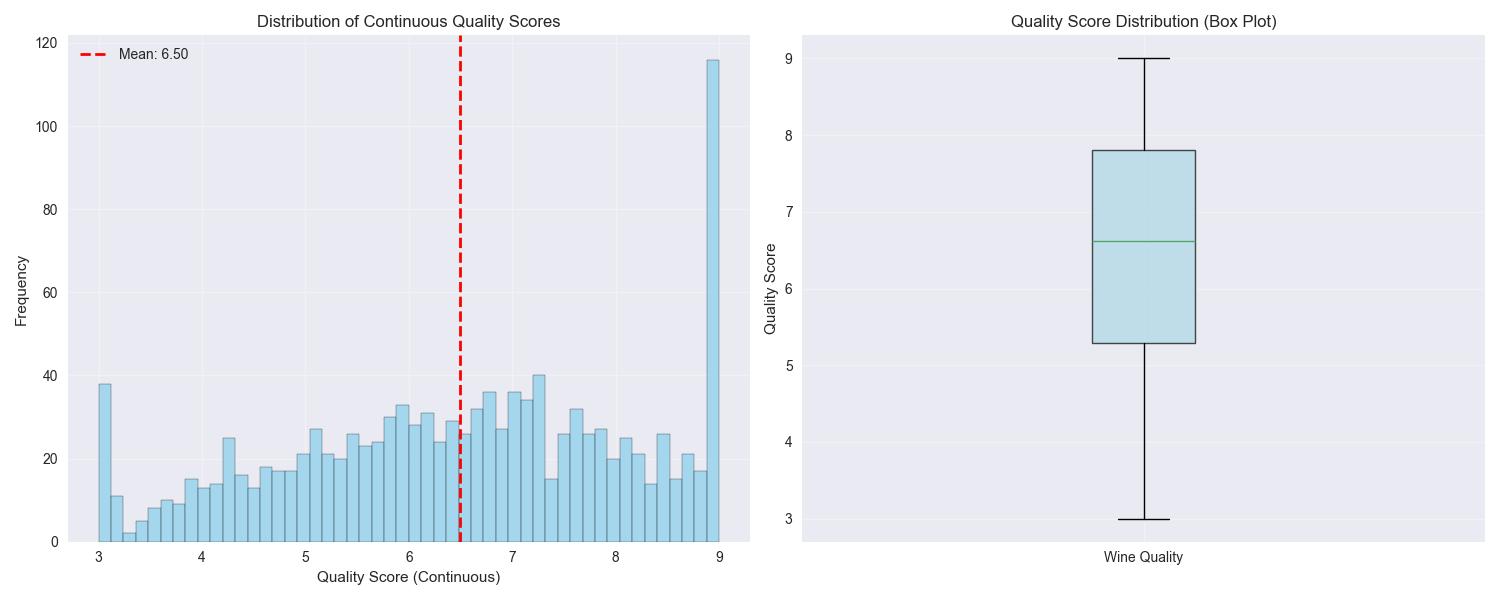


Regression vs Classification:
Continuous scores allow for more precise predictions:
Instead of: 'Quality = 6' (classification)
We predict: 'Quality = 6.23' (regression)


In [12]:
# Create a synthetic wine quality dataset for regression
np.random.seed(42)
n_samples = 1200

# Generate synthetic wine quality data with continuous scores
def generate_wine_regression_data(n_samples):
    """Generate realistic wine data with continuous quality scores"""
    
    # Create realistic wine chemistry features
    fixed_acidity = np.random.normal(8.0, 1.5, n_samples)
    volatile_acidity = np.random.normal(0.5, 0.2, n_samples)
    citric_acid = np.random.normal(0.25, 0.15, n_samples)
    residual_sugar = np.random.lognormal(1.5, 1.0, n_samples)
    chlorides = np.random.normal(0.08, 0.03, n_samples)
    free_sulfur_dioxide = np.random.normal(30, 15, n_samples)
    total_sulfur_dioxide = np.random.normal(120, 40, n_samples)
    density = np.random.normal(0.996, 0.002, n_samples)
    pH = np.random.normal(3.2, 0.15, n_samples)
    sulphates = np.random.normal(0.65, 0.15, n_samples)
    alcohol = np.random.normal(10.5, 1.2, n_samples)
    
    # Create CONTINUOUS quality score based on realistic relationships
    quality_score = (
        2.0 * (alcohol - 8) / 4 +              # Higher alcohol tends to increase quality
        -5.0 * (volatile_acidity - 0.3) +      # Lower volatile acidity is better
        2.0 * (citric_acid - 0.1) / 0.3 +      # More citric acid is good
        -3.0 * np.abs(pH - 3.3) / 0.5 +        # pH around 3.3 is optimal
        1.5 * (sulphates - 0.4) / 0.4 +        # More sulphates help
        -0.5 * np.abs(density - 0.996) * 1000 + # Density close to 0.996 is better
        np.random.normal(0, 0.4, n_samples)     # Add noise for realism
    )
    
    # Convert to continuous quality ratings (3.0-9.0 scale with decimals)
    quality = np.clip(quality_score + 6.0, 3.0, 9.0)
    
    # Add small random variations to make it truly continuous
    quality += np.random.normal(0, 0.1, n_samples)
    quality = np.clip(quality, 3.0, 9.0)
    
    # Create DataFrame
    data = {
        'fixed_acidity': fixed_acidity,
        'volatile_acidity': volatile_acidity,
        'citric_acid': citric_acid,
        'residual_sugar': residual_sugar,
        'chlorides': chlorides,
        'free_sulfur_dioxide': free_sulfur_dioxide,
        'total_sulfur_dioxide': total_sulfur_dioxide,
        'density': density,
        'pH': pH,
        'sulphates': sulphates,
        'alcohol': alcohol,
        'quality': quality
    }
    
    return pd.DataFrame(data)

# Generate the dataset
df = generate_wine_regression_data(n_samples)

print("Wine Quality Regression Dataset Overview")
print("=" * 50)
print(f"Dataset shape: {df.shape}")
print(f"Features: {df.columns.tolist()[:-1]}")
print(f"Target: {df.columns[-1]} (continuous)")
print(f"Quality range: {df['quality'].min():.2f} - {df['quality'].max():.2f}")
print(f"Quality mean: {df['quality'].mean():.2f} ± {df['quality'].std():.2f}")
print()

print("First 10 quality scores (showing continuous values):")
print(df['quality'].head(10).round(2).tolist())
print()

print("Dataset Statistics:")
display(df.describe())

# Visualize continuous quality distribution
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(7, 3))

# Histogram of continuous quality scores
ax1.hist(df['quality'], bins=50, alpha=0.7, color='skyblue', edgecolor='black')
ax1.set_xlabel('Quality Score (Continuous)')
ax1.set_ylabel('Frequency')
ax1.set_title('Distribution of Continuous Quality Scores')
ax1.grid(True, alpha=0.3)
ax1.axvline(df['quality'].mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {df["quality"].mean():.2f}')
ax1.legend()

# Box plot showing quality distribution
ax2.boxplot(df['quality'], vert=True, patch_artist=True, 
            boxprops=dict(facecolor='lightblue', alpha=0.7))
ax2.set_ylabel('Quality Score')
ax2.set_title('Quality Score Distribution (Box Plot)')
ax2.grid(True, alpha=0.3)
ax2.set_xticklabels(['Wine Quality'])

plt.tight_layout()
plt.show()

print(f"\nRegression vs Classification:")
print(f"Continuous scores allow for more precise predictions:")
print(f"Instead of: 'Quality = 6' (classification)")
print(f"We predict: 'Quality = 6.23' (regression)")

## 3. Data Preprocessing for Regression

Prepare the data for regression models by scaling features and handling the continuous target variable.

Regression Data Preparation
Features shape: (1200, 11)
Target shape: (1200,)
Target type: Continuous values (no encoding needed)
Target range: 3.00 to 9.00

Features most correlated with quality (for regression):
--------------------------------------------------
citric_acid              :  0.5032
alcohol                  :  0.3315
sulphates                :  0.2420
pH                       :  0.2319
chlorides                :  0.0363
free_sulfur_dioxide      :  0.0016
fixed_acidity            : -0.0085
density                  : -0.0149
total_sulfur_dioxide     : -0.0235
residual_sugar           : -0.0367
volatile_acidity         : -0.5066

Data splits:
Training set: 960 samples
Test set: 240 samples
Number of features: 11

Target statistics (original scale):
Training - Mean: 6.484, Std: 1.682
Test     - Mean: 6.542, Std: 1.567

Target statistics (scaled for neural network):
Training - Mean: 0.000, Std: 1.000
Test     - Mean: 0.034, Std: 0.930


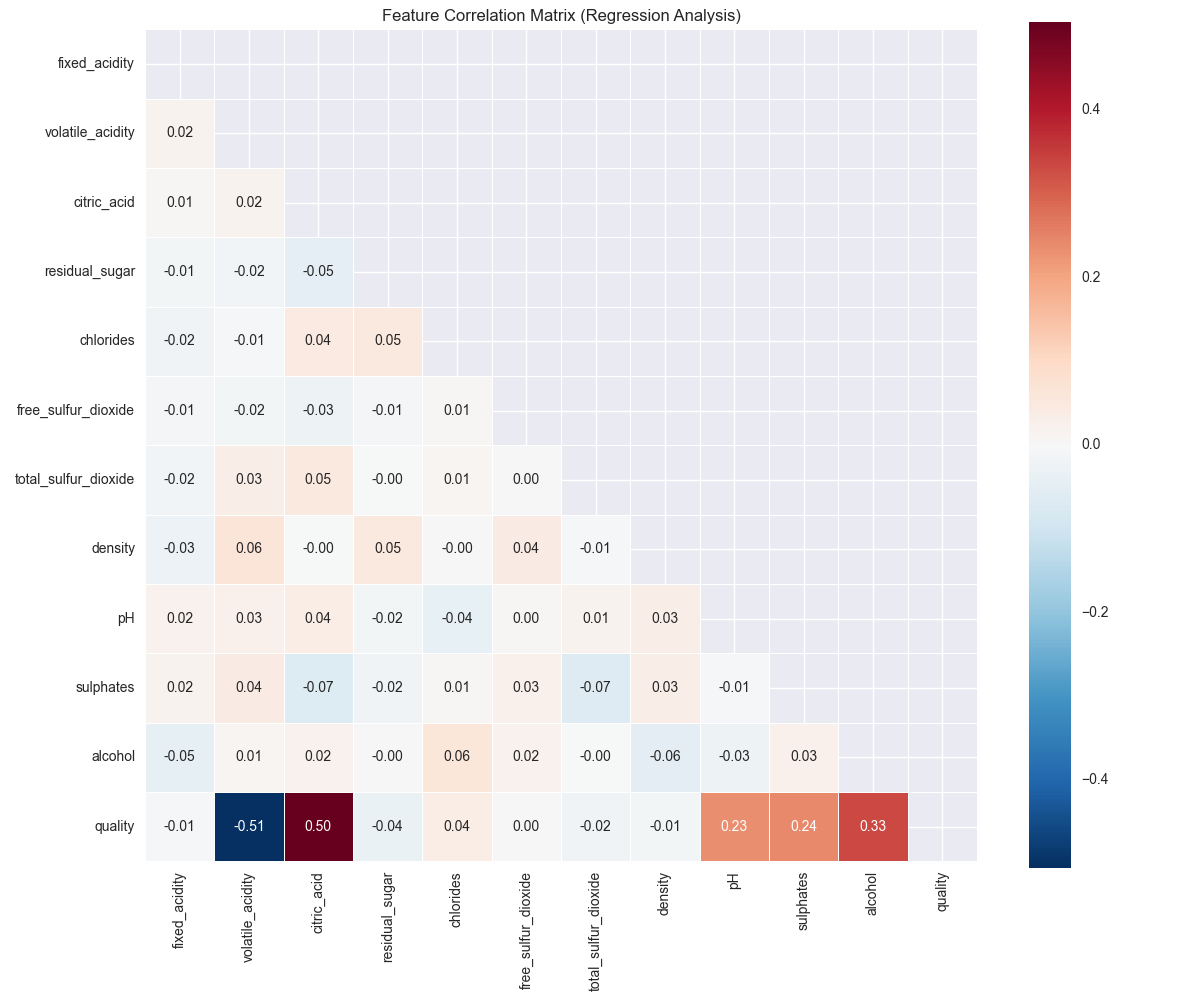

In [13]:
# Prepare features and target for regression
X = df.drop('quality', axis=1)
y = df['quality']  # Keep as continuous values (no encoding needed)

print("Regression Data Preparation")
print("=" * 50)
print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")
print(f"Target type: Continuous values (no encoding needed)")
print(f"Target range: {y.min():.2f} to {y.max():.2f}")
print()

# Feature correlation analysis
correlation_matrix = df.corr()
quality_correlations = correlation_matrix['quality'].sort_values(ascending=False)

print("Features most correlated with quality (for regression):")
print("-" * 50)
for feature, corr in quality_correlations.items():
    if feature != 'quality':
        print(f"{feature:<25}: {corr:>7.4f}")
print()

# Split the data (no stratification needed for regression)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Scale the features
scaler_X = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

# For neural networks, we can also scale the target (optional)
scaler_y = StandardScaler()
y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1)).flatten()
y_test_scaled = scaler_y.transform(y_test.values.reshape(-1, 1)).flatten()

# Convert to PyTorch tensors for neural network
X_train_tensor = torch.FloatTensor(X_train_scaled).to(device)
y_train_tensor = torch.FloatTensor(y_train_scaled).to(device)
X_test_tensor = torch.FloatTensor(X_test_scaled).to(device)
y_test_tensor = torch.FloatTensor(y_test_scaled).to(device)

print(f"Data splits:")
print(f"Training set: {X_train_tensor.shape[0]} samples")
print(f"Test set: {X_test_tensor.shape[0]} samples")
print(f"Number of features: {X_train_tensor.shape[1]}")
print()

# Target statistics
print(f"Target statistics (original scale):")
print(f"Training - Mean: {y_train.mean():.3f}, Std: {y_train.std():.3f}")
print(f"Test     - Mean: {y_test.mean():.3f}, Std: {y_test.std():.3f}")
print()

print(f"Target statistics (scaled for neural network):")
print(f"Training - Mean: {y_train_scaled.mean():.3f}, Std: {y_train_scaled.std():.3f}")
print(f"Test     - Mean: {y_test_scaled.mean():.3f}, Std: {y_test_scaled.std():.3f}")

# Visualize feature correlations
plt.figure(figsize=(6, 5))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='RdBu_r', center=0, 
            fmt='.2f', square=True, linewidths=0.5)
plt.title('Feature Correlation Matrix (Regression Analysis)')
plt.tight_layout()
plt.show()

## 4. Define Neural Network for Regression

Create a neural network architecture optimized for regression with appropriate activation functions and output layers for continuous predictions.

In [14]:
class WineQualityRegressor(nn.Module):
    """Neural Network for Wine Quality Regression"""
    
    def __init__(self, input_size=11, hidden_sizes=[128, 64, 32], dropout_rate=0.2):
        super(WineQualityRegressor, self).__init__()
        
        layers = []
        prev_size = input_size
        
        # Hidden layers with batch normalization and dropout
        for i, hidden_size in enumerate(hidden_sizes):
            layers.extend([
                nn.Linear(prev_size, hidden_size),
                nn.BatchNorm1d(hidden_size),
                nn.ReLU(),
                nn.Dropout(dropout_rate)
            ])
            prev_size = hidden_size
        
        # Output layer for regression (no activation - linear output)
        layers.append(nn.Linear(prev_size, 1))
        
        self.network = nn.Sequential(*layers)
        
        # Initialize weights
        self.init_weights()
    
    def init_weights(self):
        """Initialize network weights"""
        for m in self.modules():
            if isinstance(m, nn.Linear):
                nn.init.xavier_uniform_(m.weight)
                nn.init.constant_(m.bias, 0)
    
    def forward(self, x):
        return self.network(x).squeeze()  # Remove extra dimension
    
    def predict_with_uncertainty(self, x, num_samples=100):
        """Predict with uncertainty estimation using dropout at inference"""
        self.train()  # Enable dropout for uncertainty
        predictions = []
        
        with torch.no_grad():
            for _ in range(num_samples):
                pred = self.forward(x)
                predictions.append(pred.cpu().numpy())
        
        predictions = np.array(predictions)
        mean_pred = np.mean(predictions, axis=0)
        std_pred = np.std(predictions, axis=0)
        
        return mean_pred, std_pred

# Create the regression model
wine_regressor = WineQualityRegressor(
    input_size=X_train_tensor.shape[1],
    hidden_sizes=[128, 64, 32, 16],
    dropout_rate=0.2
).to(device)

print("Wine Quality Regression Neural Network")
print("=" * 60)
print(wine_regressor)
print(f"\nTotal parameters: {sum(p.numel() for p in wine_regressor.parameters())}")
print(f"Model type: Regression (continuous output)")
print(f"Output: Single continuous value (quality score)")
print(f"Loss function: MSE (Mean Squared Error)")
print()

# Test forward pass
with torch.no_grad():
    test_input = X_train_tensor[:5]
    test_output = wine_regressor(test_input)
    print(f"Test forward pass:")
    print(f"Input shape: {test_input.shape}")
    print(f"Output shape: {test_output.shape}")
    print(f"Sample predictions: {test_output.cpu().numpy()}")

Wine Quality Regression Neural Network
WineQualityRegressor(
  (network): Sequential(
    (0): Linear(in_features=11, out_features=128, bias=True)
    (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Dropout(p=0.2, inplace=False)
    (4): Linear(in_features=128, out_features=64, bias=True)
    (5): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): ReLU()
    (7): Dropout(p=0.2, inplace=False)
    (8): Linear(in_features=64, out_features=32, bias=True)
    (9): BatchNorm1d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (10): ReLU()
    (11): Dropout(p=0.2, inplace=False)
    (12): Linear(in_features=32, out_features=16, bias=True)
    (13): BatchNorm1d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (14): ReLU()
    (15): Dropout(p=0.2, inplace=False)
    (16): Linear(in_features=16, out_features=1, bias=True)
  )
)

Total parameters: 1289

## 5. Training Function for Regression

Implement training loop using regression loss functions (MSE, MAE) with proper optimization techniques for continuous target prediction.

In [15]:
def train_wine_regressor(model, X_train, y_train, X_test, y_test, 
                        lr=0.001, epochs=400, print_every=100):
    """Train the wine quality regression model"""
    
    # Regression loss function
    criterion = nn.MSELoss()  # Mean Squared Error for regression
    optimizer = optim.Adam(model.parameters(), lr=lr, weight_decay=1e-4)
    scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', patience=25, factor=0.5)
    
    # Tracking metrics
    train_losses, test_losses = [], []
    train_maes, test_maes = [], []  # Mean Absolute Error
    train_r2s, test_r2s = [], []    # R² scores
    
    best_test_loss = float('inf')
    
    print("Training Wine Quality Regressor...")
    print("=" * 60)
    
    for epoch in range(epochs):
        # Training phase
        model.train()
        optimizer.zero_grad()
        
        # Forward pass
        train_outputs = model(X_train)
        train_loss = criterion(train_outputs, y_train)
        
        # Backward pass
        train_loss.backward()
        optimizer.step()
        
        # Calculate training metrics
        with torch.no_grad():
            train_mae = torch.mean(torch.abs(train_outputs - y_train))
            
            # R² calculation (coefficient of determination)
            train_ss_res = torch.sum((y_train - train_outputs) ** 2)
            train_ss_tot = torch.sum((y_train - torch.mean(y_train)) ** 2)
            train_r2 = 1 - (train_ss_res / train_ss_tot)
        
        # Evaluation phase
        model.eval()
        with torch.no_grad():
            test_outputs = model(X_test)
            test_loss = criterion(test_outputs, y_test)
            test_mae = torch.mean(torch.abs(test_outputs - y_test))
            
            # R² for test set
            test_ss_res = torch.sum((y_test - test_outputs) ** 2)
            test_ss_tot = torch.sum((y_test - torch.mean(y_test)) ** 2)
            test_r2 = 1 - (test_ss_res / test_ss_tot)
        
        # Store metrics
        train_losses.append(train_loss.item())
        test_losses.append(test_loss.item())
        train_maes.append(train_mae.item())
        test_maes.append(test_mae.item())
        train_r2s.append(train_r2.item())
        test_r2s.append(test_r2.item())
        
        # Learning rate scheduling
        scheduler.step(test_loss)
        
        # Save best model
        if test_loss < best_test_loss:
            best_test_loss = test_loss
            torch.save(model.state_dict(), 'best_wine_regressor.pth')
        
        # Print progress
        if (epoch + 1) % print_every == 0:
            print(f'Epoch [{epoch+1}/{epochs}]')
            print(f'Train Loss (MSE): {train_loss.item():.6f}, Train MAE: {train_mae.item():.4f}, Train R²: {train_r2.item():.4f}')
            print(f'Test Loss (MSE):  {test_loss.item():.6f}, Test MAE:  {test_mae.item():.4f}, Test R²:  {test_r2.item():.4f}')
            print(f'Learning Rate: {optimizer.param_groups[0]["lr"]:.6f}')
            print('-' * 60)
    
    # Load best model
    model.load_state_dict(torch.load('best_wine_regressor.pth'))
    
    return {
        'train_losses': train_losses,
        'test_losses': test_losses,
        'train_maes': train_maes,
        'test_maes': test_maes,
        'train_r2s': train_r2s,
        'test_r2s': test_r2s
    }

# Train the model
training_results = train_wine_regressor(
    wine_regressor, X_train_tensor, y_train_tensor, X_test_tensor, y_test_tensor,
    lr=0.001, epochs=400, print_every=100
)

print("\nTraining completed! Best model saved.")

# Convert predictions back to original scale for interpretation
wine_regressor.eval()
with torch.no_grad():
    train_pred_scaled = wine_regressor(X_train_tensor)
    test_pred_scaled = wine_regressor(X_test_tensor)

# Inverse transform predictions
train_pred_original = scaler_y.inverse_transform(train_pred_scaled.cpu().numpy().reshape(-1, 1)).flatten()
test_pred_original = scaler_y.inverse_transform(test_pred_scaled.cpu().numpy().reshape(-1, 1)).flatten()

print(f"\nFinal Performance (Original Scale):")
print(f"Train RMSE: {np.sqrt(mean_squared_error(y_train, train_pred_original)):.4f}")
print(f"Test RMSE:  {np.sqrt(mean_squared_error(y_test, test_pred_original)):.4f}")
print(f"Train MAE:  {mean_absolute_error(y_train, train_pred_original):.4f}")
print(f"Test MAE:   {mean_absolute_error(y_test, test_pred_original):.4f}")
print(f"Train R²:   {r2_score(y_train, train_pred_original):.4f}")
print(f"Test R²:    {r2_score(y_test, test_pred_original):.4f}")

Training Wine Quality Regressor...
Epoch [100/400]
Train Loss (MSE): 0.354392, Train MAE: 0.4658, Train R²: 0.6456
Test Loss (MSE):  0.147351, Test MAE:  0.3085, Test R²:  0.8297
Learning Rate: 0.001000
------------------------------------------------------------
Epoch [200/400]
Train Loss (MSE): 0.217674, Train MAE: 0.3649, Train R²: 0.7823
Test Loss (MSE):  0.126579, Test MAE:  0.2893, Test R²:  0.8537
Learning Rate: 0.001000
------------------------------------------------------------
Epoch [300/400]
Train Loss (MSE): 0.192538, Train MAE: 0.3442, Train R²: 0.8075
Test Loss (MSE):  0.125205, Test MAE:  0.2869, Test R²:  0.8553
Learning Rate: 0.000125
------------------------------------------------------------
Epoch [400/400]
Train Loss (MSE): 0.212418, Train MAE: 0.3623, Train R²: 0.7876
Test Loss (MSE):  0.124499, Test MAE:  0.2860, Test R²:  0.8561
Learning Rate: 0.000016
------------------------------------------------------------

Training completed! Best model saved.

Final Per

## 6. Model Performance Analysis

Analyze training progress and model performance using regression-specific visualizations including prediction vs actual plots and residual analysis.

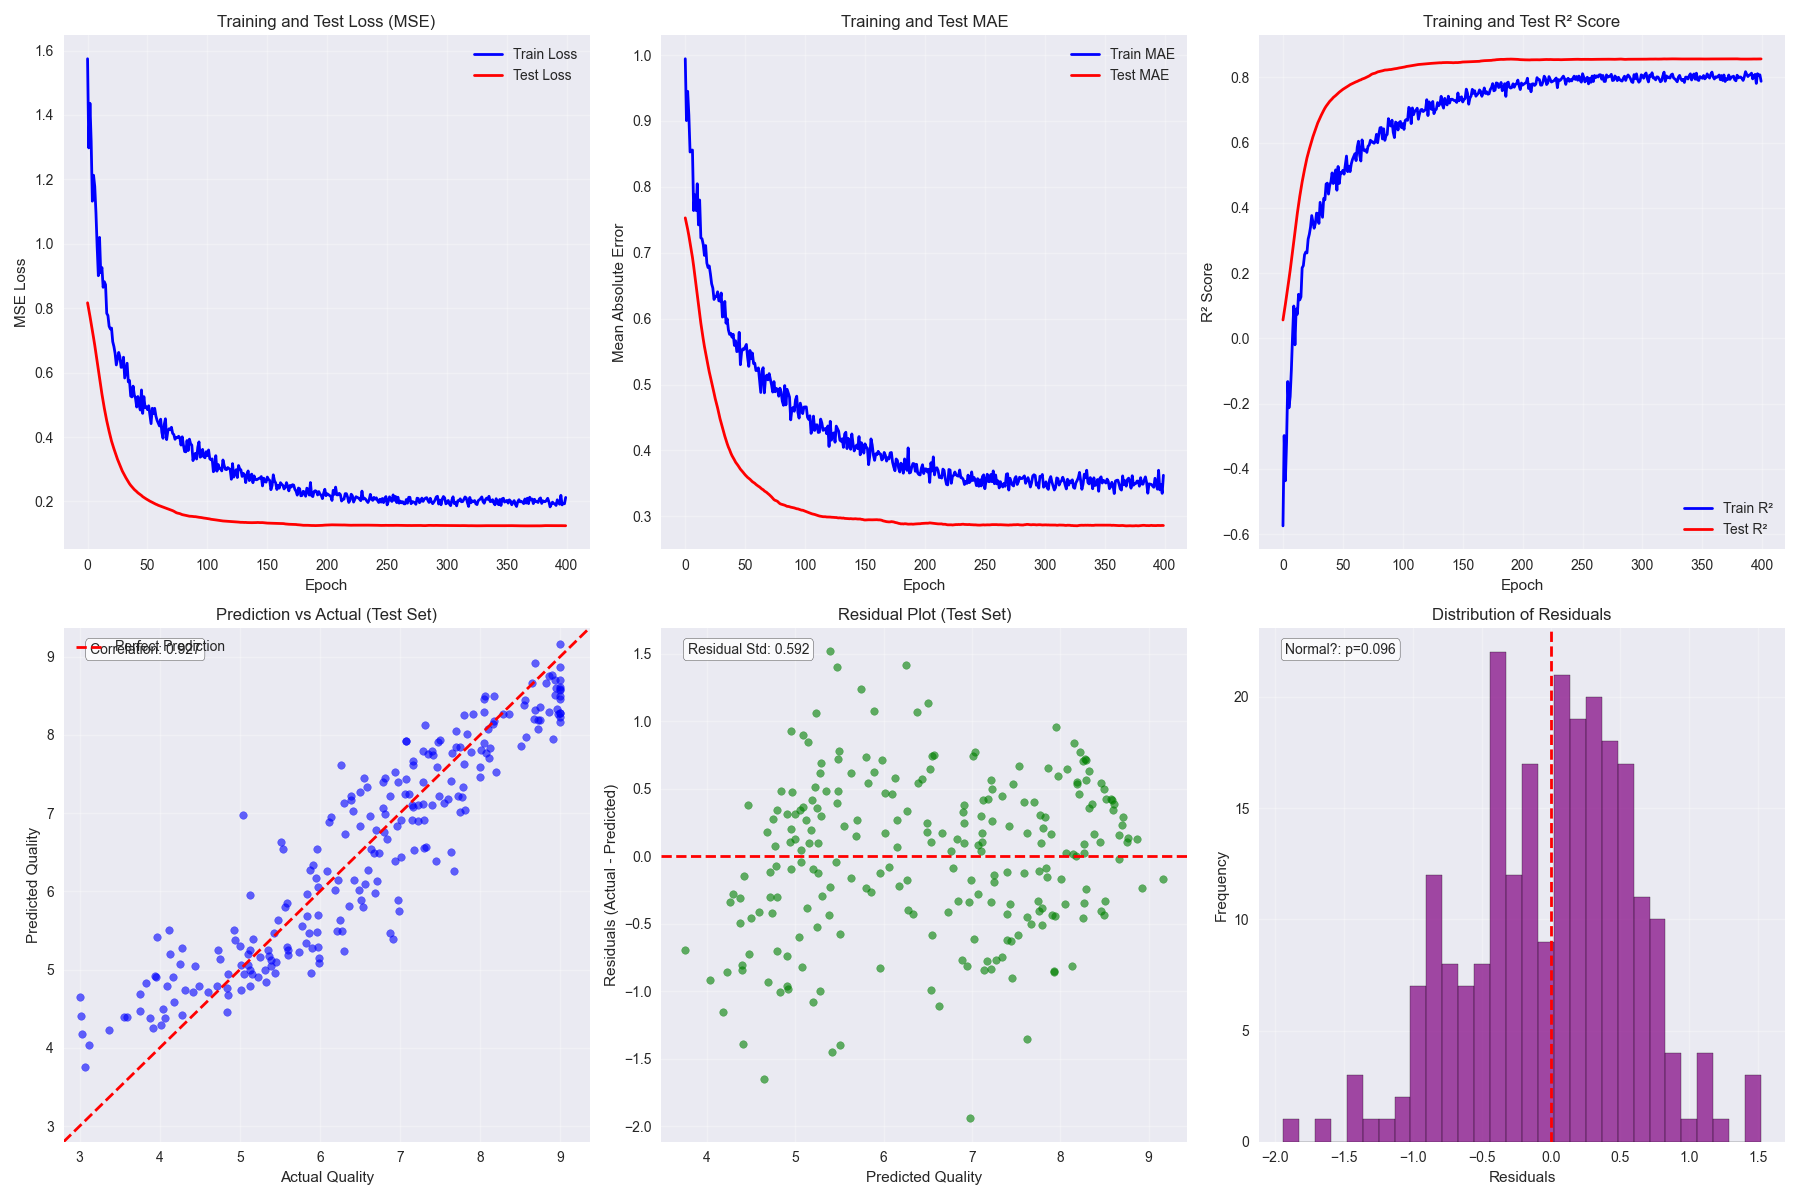

COMPREHENSIVE REGRESSION ANALYSIS
📊 PERFORMANCE METRICS (Test Set):
  Root Mean Square Error (RMSE): 0.5921
  Mean Absolute Error (MAE):     0.4799
  R² Score (Coefficient of Det): 0.8566
  Correlation Coefficient:       0.9272

🎯 PREDICTION ACCURACY ANALYSIS:
  Mean Absolute Residual:        0.4799
  Std of Residuals:              0.5921
  95% of predictions within:     ±1.1605 quality points
  Max prediction error:          1.9417
  % predictions within ±0.5:     61.3%
  % predictions within ±0.3:     35.4%
  % predictions within ±0.1:     9.6%

📏 PREDICTION RANGE ANALYSIS:
  Actual quality range:          3.00 - 9.00
  Predicted quality range:       3.75 - 9.17
  Mean actual quality:           6.542
  Mean predicted quality:        6.543

🔍 UNCERTAINTY ANALYSIS:
  Average prediction uncertainty: 0.573
  Max prediction uncertainty:     1.316
  Min prediction uncertainty:     0.293

🏭 INDUSTRIAL QUALITY CONTROL INTERPRETATION:
  ⚠️  ACCEPTABLE: Moderate precision, suitable for general

In [16]:
# Comprehensive performance analysis for regression
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# 1. Training curves - Loss (MSE)
axes[0,0].plot(training_results['train_losses'], label='Train Loss', color='blue', linewidth=2)
axes[0,0].plot(training_results['test_losses'], label='Test Loss', color='red', linewidth=2)
axes[0,0].set_xlabel('Epoch')
axes[0,0].set_ylabel('MSE Loss')
axes[0,0].set_title('Training and Test Loss (MSE)')
axes[0,0].legend()
axes[0,0].grid(True, alpha=0.3)

# 2. Training curves - MAE
axes[0,1].plot(training_results['train_maes'], label='Train MAE', color='blue', linewidth=2)
axes[0,1].plot(training_results['test_maes'], label='Test MAE', color='red', linewidth=2)
axes[0,1].set_xlabel('Epoch')
axes[0,1].set_ylabel('Mean Absolute Error')
axes[0,1].set_title('Training and Test MAE')
axes[0,1].legend()
axes[0,1].grid(True, alpha=0.3)

# 3. Training curves - R²
axes[0,2].plot(training_results['train_r2s'], label='Train R²', color='blue', linewidth=2)
axes[0,2].plot(training_results['test_r2s'], label='Test R²', color='red', linewidth=2)
axes[0,2].set_xlabel('Epoch')
axes[0,2].set_ylabel('R² Score')
axes[0,2].set_title('Training and Test R² Score')
axes[0,2].legend()
axes[0,2].grid(True, alpha=0.3)

# 4. Prediction vs Actual (Test Set)
min_qual = min(y_test.min(), test_pred_original.min()) - 0.2
max_qual = max(y_test.max(), test_pred_original.max()) + 0.2

axes[1,0].scatter(y_test, test_pred_original, alpha=0.6, color='blue', s=30)
axes[1,0].plot([min_qual, max_qual], [min_qual, max_qual], 'r--', linewidth=2, label='Perfect Prediction')
axes[1,0].set_xlabel('Actual Quality')
axes[1,0].set_ylabel('Predicted Quality')
axes[1,0].set_title('Prediction vs Actual (Test Set)')
axes[1,0].legend()
axes[1,0].grid(True, alpha=0.3)
axes[1,0].set_xlim(min_qual, max_qual)
axes[1,0].set_ylim(min_qual, max_qual)

# Add correlation coefficient
corr_coef = np.corrcoef(y_test, test_pred_original)[0,1]
axes[1,0].text(0.05, 0.95, f'Correlation: {corr_coef:.3f}', transform=axes[1,0].transAxes, 
               bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

# 5. Residual Analysis
residuals = y_test - test_pred_original
axes[1,1].scatter(test_pred_original, residuals, alpha=0.6, color='green', s=30)
axes[1,1].axhline(y=0, color='r', linestyle='--', linewidth=2)
axes[1,1].set_xlabel('Predicted Quality')
axes[1,1].set_ylabel('Residuals (Actual - Predicted)')
axes[1,1].set_title('Residual Plot (Test Set)')
axes[1,1].grid(True, alpha=0.3)

# Add residual statistics
residual_std = np.std(residuals)
axes[1,1].text(0.05, 0.95, f'Residual Std: {residual_std:.3f}', transform=axes[1,1].transAxes,
               bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

# 6. Residual Distribution
axes[1,2].hist(residuals, bins=30, alpha=0.7, color='purple', edgecolor='black')
axes[1,2].axvline(x=0, color='r', linestyle='--', linewidth=2)
axes[1,2].set_xlabel('Residuals')
axes[1,2].set_ylabel('Frequency')
axes[1,2].set_title('Distribution of Residuals')
axes[1,2].grid(True, alpha=0.3)

# Add normality information
shapiro_stat, shapiro_p = stats.shapiro(residuals)
axes[1,2].text(0.05, 0.95, f'Normal?: p={shapiro_p:.3f}', transform=axes[1,2].transAxes,
               bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

plt.tight_layout()
plt.show()

# Detailed regression analysis
print("COMPREHENSIVE REGRESSION ANALYSIS")
print("=" * 70)

# Basic metrics
test_rmse = np.sqrt(mean_squared_error(y_test, test_pred_original))
test_mae = mean_absolute_error(y_test, test_pred_original)
test_r2 = r2_score(y_test, test_pred_original)

print(f"📊 PERFORMANCE METRICS (Test Set):")
print(f"  Root Mean Square Error (RMSE): {test_rmse:.4f}")
print(f"  Mean Absolute Error (MAE):     {test_mae:.4f}")
print(f"  R² Score (Coefficient of Det): {test_r2:.4f}")
print(f"  Correlation Coefficient:       {corr_coef:.4f}")
print()

# Error analysis
abs_errors = np.abs(residuals)
print(f"🎯 PREDICTION ACCURACY ANALYSIS:")
print(f"  Mean Absolute Residual:        {np.mean(abs_errors):.4f}")
print(f"  Std of Residuals:              {np.std(residuals):.4f}")
print(f"  95% of predictions within:     ±{1.96 * np.std(residuals):.4f} quality points")
print(f"  Max prediction error:          {np.max(abs_errors):.4f}")
print(f"  % predictions within ±0.5:     {(abs_errors <= 0.5).mean()*100:.1f}%")
print(f"  % predictions within ±0.3:     {(abs_errors <= 0.3).mean()*100:.1f}%")
print(f"  % predictions within ±0.1:     {(abs_errors <= 0.1).mean()*100:.1f}%")
print()

# Quality range analysis
print(f"📏 PREDICTION RANGE ANALYSIS:")
print(f"  Actual quality range:          {y_test.min():.2f} - {y_test.max():.2f}")
print(f"  Predicted quality range:       {test_pred_original.min():.2f} - {test_pred_original.max():.2f}")
print(f"  Mean actual quality:           {y_test.mean():.3f}")
print(f"  Mean predicted quality:        {test_pred_original.mean():.3f}")
print()

# Model confidence analysis with uncertainty
print(f"🔍 UNCERTAINTY ANALYSIS:")
# Use dropout-based uncertainty estimation
test_mean_pred, test_std_pred = wine_regressor.predict_with_uncertainty(X_test_tensor, num_samples=50)
test_mean_pred_original = scaler_y.inverse_transform(test_mean_pred.reshape(-1, 1)).flatten()
test_std_pred_original = test_std_pred * scaler_y.scale_[0]  # Scale standard deviation

print(f"  Average prediction uncertainty: {np.mean(test_std_pred_original):.3f}")
print(f"  Max prediction uncertainty:     {np.max(test_std_pred_original):.3f}")
print(f"  Min prediction uncertainty:     {np.min(test_std_pred_original):.3f}")
print()

# Industrial quality control interpretation
print(f"🏭 INDUSTRIAL QUALITY CONTROL INTERPRETATION:")
if test_mae <= 0.2:
    print("  ✅ EXCELLENT: Very precise quality predictions suitable for high-precision applications")
elif test_mae <= 0.4:
    print("  ✅ GOOD: Reliable quality predictions suitable for most industrial applications")
elif test_mae <= 0.6:
    print("  ⚠️  ACCEPTABLE: Moderate precision, suitable for general quality control")
else:
    print("  ❌ POOR: Low precision, requires improvement for industrial use")

if test_r2 >= 0.8:
    print(f"  ✅ STRONG: Model explains {test_r2*100:.1f}% of quality variance")
elif test_r2 >= 0.6:
    print(f"  ✅ MODERATE: Model explains {test_r2*100:.1f}% of quality variance")
else:
    print(f"  ⚠️  WEAK: Model explains only {test_r2*100:.1f}% of quality variance")

## 7. Regression Metrics Evaluation

Evaluate model performance using regression metrics such as MSE, MAE, R², and RMSE, with quality control specific interpretations.

DETAILED REGRESSION METRICS
Model: Neural Network Regressor
------------------------------------------------------------
📊 CORE REGRESSION METRICS:
  Mean Squared Error (MSE):      0.350571
  Root Mean Squared Error (RMSE): 0.5921
  Mean Absolute Error (MAE):     0.4799
  R² Score:                      0.8566

📈 ADDITIONAL METRICS:
  Mean Absolute Percentage Error: 8.34%
  Explained Variance Score:      0.8566
  Residual Standard Deviation:   0.5921
  Mean Residual (Bias):          -0.0014

🎯 QUALITY RANGE SPECIFIC PERFORMANCE:
  Quality 3-4 (n=16): MAE=0.949, R²=-6.316
  Quality 4-5 (n=25): MAE=0.472, R²=-2.321
  Quality 5-6 (n=50): MAE=0.396, R²=-1.474
  Quality 6-7 (n=48): MAE=0.575, R²=-5.597
  Quality 7-8 (n=51): MAE=0.426, R²=-2.529
  Quality 8-9 (n=39): MAE=0.356, R²=-0.536



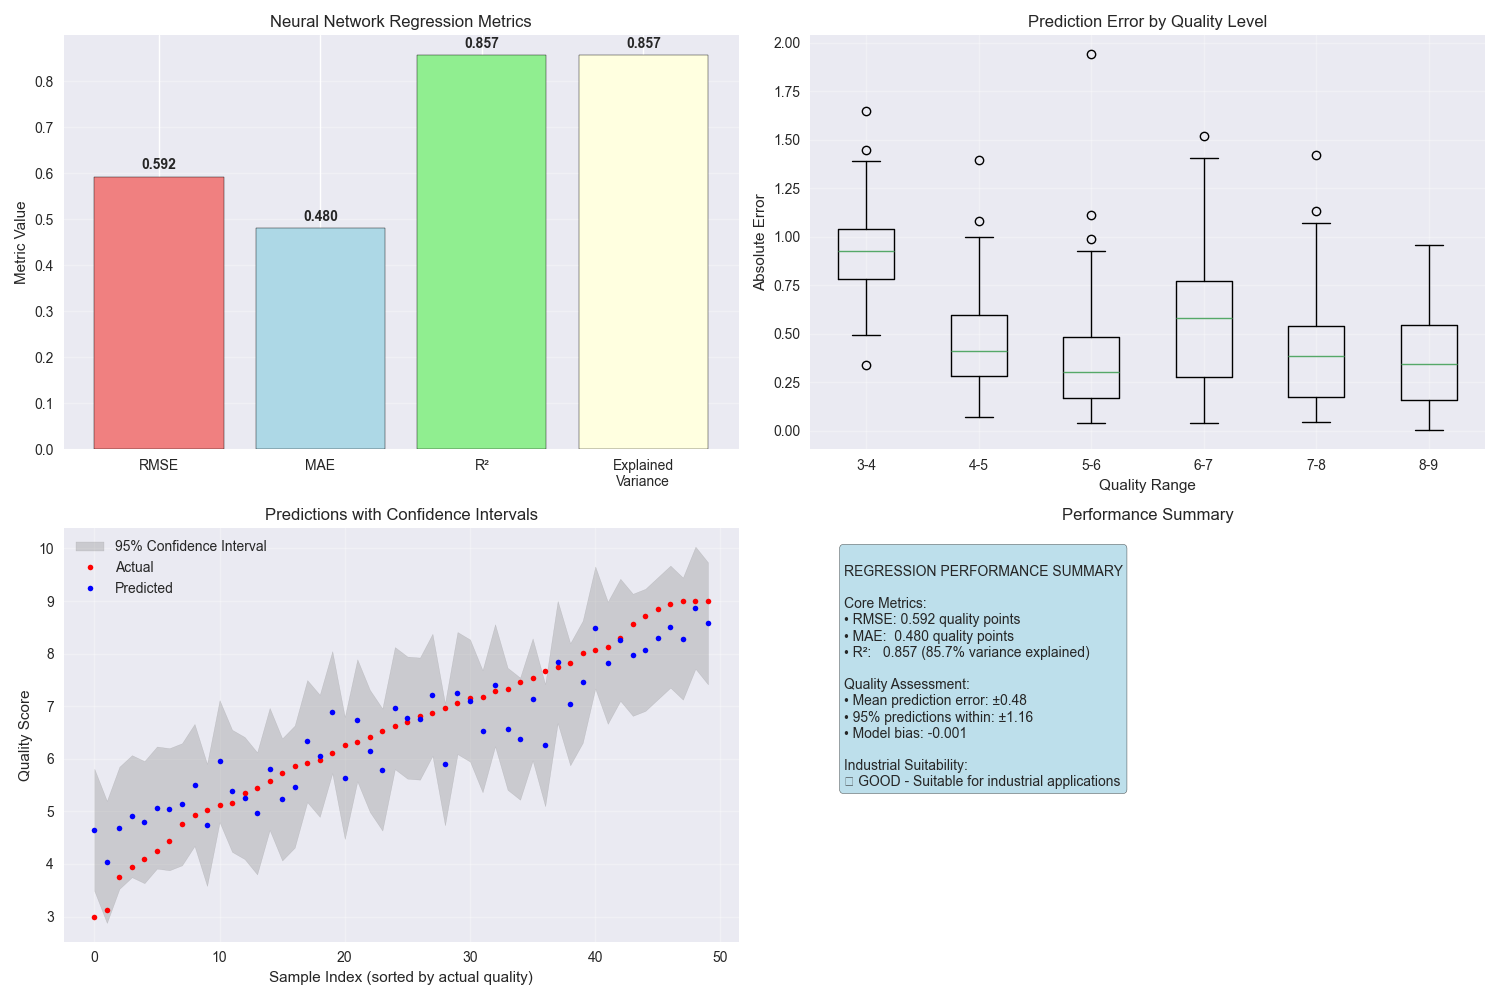


🎯 BASELINE COMPARISONS:
  Predicting mean quality (baseline): MAE = 1.306
  Neural Network Model:               MAE = 0.480
  Improvement over baseline:          63.3%

📊 STATISTICAL SIGNIFICANCE:
  Pearson correlation: 0.9272 (p-value: 1.89e-103)
  Prediction-actual correlation is significant at α=0.05


In [17]:
# Detailed regression metrics with visualization
def evaluate_regression_model(y_true, y_pred, model_name="Model"):
    """Comprehensive evaluation of regression model"""
    
    # Basic regression metrics
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    
    # Additional metrics
    residuals = y_true - y_pred
    residual_std = np.std(residuals)
    mean_residual = np.mean(residuals)
    
    # Mean Absolute Percentage Error (MAPE)
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    
    # Explained Variance Score
    from sklearn.metrics import explained_variance_score
    explained_var = explained_variance_score(y_true, y_pred)
    
    # Create metrics dictionary
    metrics = {
        'MSE': mse,
        'RMSE': rmse,
        'MAE': mae,
        'R²': r2,
        'MAPE': mape,
        'Explained_Variance': explained_var,
        'Residual_Std': residual_std,
        'Mean_Residual': mean_residual
    }
    
    return metrics

# Evaluate our neural network
nn_metrics = evaluate_regression_model(y_test, test_pred_original, "Neural Network")

print("DETAILED REGRESSION METRICS")
print("=" * 60)
print(f"Model: Neural Network Regressor")
print("-" * 60)

# Display metrics in organized format
print("📊 CORE REGRESSION METRICS:")
print(f"  Mean Squared Error (MSE):      {nn_metrics['MSE']:.6f}")
print(f"  Root Mean Squared Error (RMSE): {nn_metrics['RMSE']:.4f}")
print(f"  Mean Absolute Error (MAE):     {nn_metrics['MAE']:.4f}")
print(f"  R² Score:                      {nn_metrics['R²']:.4f}")
print()

print("📈 ADDITIONAL METRICS:")
print(f"  Mean Absolute Percentage Error: {nn_metrics['MAPE']:.2f}%")
print(f"  Explained Variance Score:      {nn_metrics['Explained_Variance']:.4f}")
print(f"  Residual Standard Deviation:   {nn_metrics['Residual_Std']:.4f}")
print(f"  Mean Residual (Bias):          {nn_metrics['Mean_Residual']:.4f}")
print()

# Quality control specific metrics
quality_ranges = [(3.0, 4.0), (4.0, 5.0), (5.0, 6.0), (6.0, 7.0), (7.0, 8.0), (8.0, 9.0)]
print("🎯 QUALITY RANGE SPECIFIC PERFORMANCE:")
for low, high in quality_ranges:
    mask = (y_test >= low) & (y_test < high)
    if mask.sum() > 0:
        range_mae = mean_absolute_error(y_test[mask], test_pred_original[mask])
        range_r2 = r2_score(y_test[mask], test_pred_original[mask])
        print(f"  Quality {low:.0f}-{high:.0f} (n={mask.sum():2d}): MAE={range_mae:.3f}, R²={range_r2:.3f}")

print()

# Create detailed metrics visualization
fig, axes = plt.subplots(2, 2, figsize=(7, 5))

# 1. Metrics comparison (bar chart)
metrics_names = ['RMSE', 'MAE', 'R²', 'Explained\nVariance']
metrics_values = [nn_metrics['RMSE'], nn_metrics['MAE'], nn_metrics['R²'], nn_metrics['Explained_Variance']]
colors = ['lightcoral', 'lightblue', 'lightgreen', 'lightyellow']

bars = axes[0,0].bar(metrics_names, metrics_values, color=colors, edgecolor='black')
axes[0,0].set_title('Neural Network Regression Metrics')
axes[0,0].set_ylabel('Metric Value')
axes[0,0].grid(True, alpha=0.3, axis='y')

# Add value labels on bars
for bar, value in zip(bars, metrics_values):
    axes[0,0].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, 
                   f'{value:.3f}', ha='center', va='bottom', fontweight='bold')

# 2. Error distribution by quality level
quality_bins = np.arange(3, 10, 1)
quality_digitized = np.digitize(y_test, quality_bins)
error_by_quality = [np.abs(y_test[quality_digitized == i] - test_pred_original[quality_digitized == i]) 
                   for i in range(1, len(quality_bins))]

axes[0,1].boxplot(error_by_quality, labels=[f'{q:.0f}-{q+1:.0f}' for q in quality_bins[:-1]])
axes[0,1].set_xlabel('Quality Range')
axes[0,1].set_ylabel('Absolute Error')
axes[0,1].set_title('Prediction Error by Quality Level')
axes[0,1].grid(True, alpha=0.3)

# 3. Prediction confidence intervals
sorted_indices = np.argsort(y_test)
y_test_sorted = y_test.iloc[sorted_indices]
y_pred_sorted = test_pred_original[sorted_indices]

# Calculate confidence intervals (using residual std as approximation)
ci_lower = y_pred_sorted - 1.96 * nn_metrics['Residual_Std']
ci_upper = y_pred_sorted + 1.96 * nn_metrics['Residual_Std']

sample_indices = np.linspace(0, len(y_test_sorted)-1, 50, dtype=int)

axes[1,0].fill_between(range(len(sample_indices)), ci_lower[sample_indices], ci_upper[sample_indices], 
                       alpha=0.3, color='gray', label='95% Confidence Interval')
axes[1,0].plot(range(len(sample_indices)), y_test_sorted.iloc[sample_indices], 'ro', markersize=4, label='Actual')
axes[1,0].plot(range(len(sample_indices)), y_pred_sorted[sample_indices], 'bo', markersize=4, label='Predicted')
axes[1,0].set_xlabel('Sample Index (sorted by actual quality)')
axes[1,0].set_ylabel('Quality Score')
axes[1,0].set_title('Predictions with Confidence Intervals')
axes[1,0].legend()
axes[1,0].grid(True, alpha=0.3)

# 4. Model performance summary
performance_text = f"""
REGRESSION PERFORMANCE SUMMARY

Core Metrics:
• RMSE: {nn_metrics['RMSE']:.3f} quality points
• MAE:  {nn_metrics['MAE']:.3f} quality points  
• R²:   {nn_metrics['R²']:.3f} ({nn_metrics['R²']*100:.1f}% variance explained)

Quality Assessment:
• Mean prediction error: ±{nn_metrics['MAE']:.2f}
• 95% predictions within: ±{1.96*nn_metrics['Residual_Std']:.2f}
• Model bias: {nn_metrics['Mean_Residual']:.3f}

Industrial Suitability:
"""

if nn_metrics['MAE'] <= 0.3:
    performance_text += "✅ EXCELLENT - High precision for quality control"
elif nn_metrics['MAE'] <= 0.5:
    performance_text += "✅ GOOD - Suitable for industrial applications"
else:
    performance_text += "⚠️ NEEDS IMPROVEMENT - Consider model tuning"

axes[1,1].text(0.05, 0.95, performance_text, transform=axes[1,1].transAxes, fontsize=10,
               verticalalignment='top', bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.8))
axes[1,1].set_title('Performance Summary')
axes[1,1].axis('off')

plt.tight_layout()
plt.show()

# Comparison with perfect prediction baseline
print("\n🎯 BASELINE COMPARISONS:")
print(f"  Predicting mean quality (baseline): MAE = {mean_absolute_error(y_test, [y_train.mean()]*len(y_test)):.3f}")
print(f"  Neural Network Model:               MAE = {nn_metrics['MAE']:.3f}")
print(f"  Improvement over baseline:          {(1 - nn_metrics['MAE']/mean_absolute_error(y_test, [y_train.mean()]*len(y_test)))*100:.1f}%")

# Statistical significance of predictions
from scipy.stats import pearsonr
pearson_corr, pearson_p = pearsonr(y_test, test_pred_original)
print(f"\n📊 STATISTICAL SIGNIFICANCE:")
print(f"  Pearson correlation: {pearson_corr:.4f} (p-value: {pearson_p:.2e})")
print(f"  Prediction-actual correlation is {'significant' if pearson_p < 0.05 else 'not significant'} at α=0.05")

## 8. Feature Importance Analysis for Regression

Calculate and visualize feature importance for regression models using gradient-based methods and compare with linear regression coefficients.

Calculating Feature Importance...

FEATURE IMPORTANCE ANALYSIS (REGRESSION)


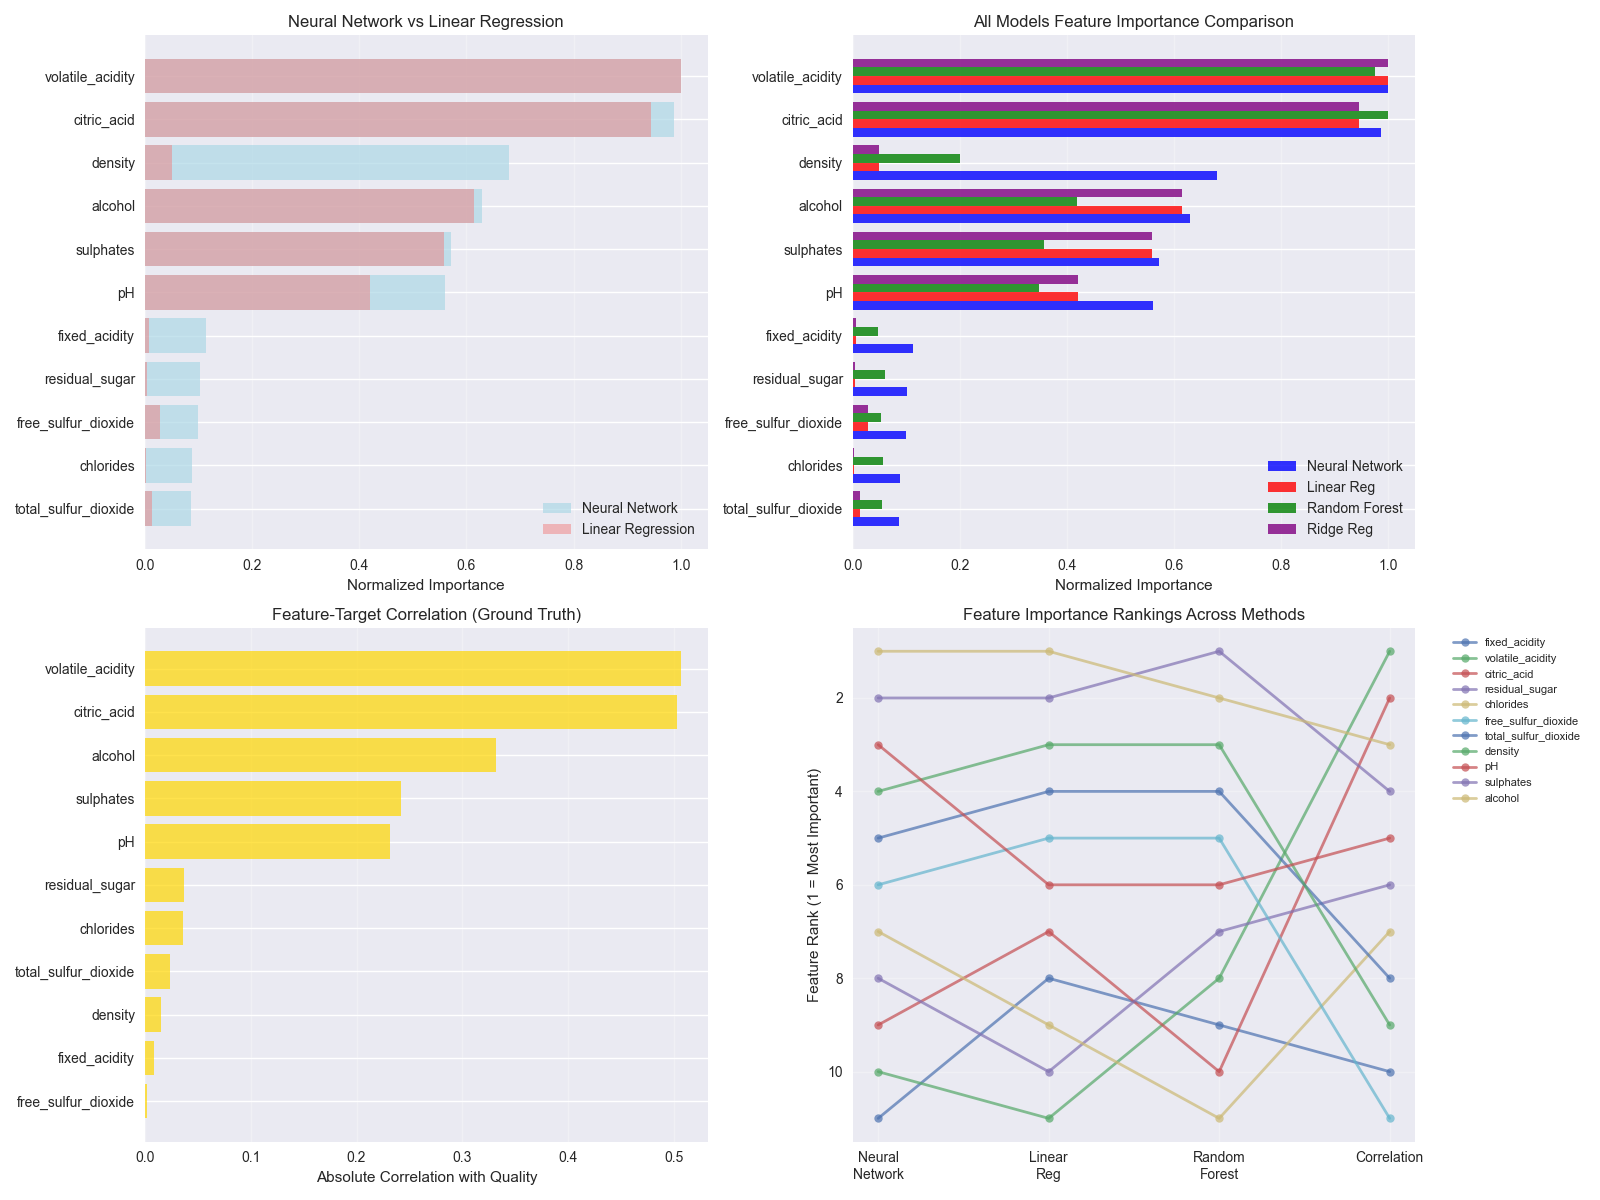

FEATURE IMPORTANCE RANKINGS (Regression Models)

Neural Network Feature Importance:
   1. volatile_acidity         : 0.4992
   2. citric_acid              : 0.4925
   3. density                  : 0.3391
   4. alcohol                  : 0.3140
   5. sulphates                : 0.2855
   6. pH                       : 0.2796
   7. fixed_acidity            : 0.0566
   8. residual_sugar           : 0.0511
   9. free_sulfur_dioxide      : 0.0497
  10. chlorides                : 0.0439
  11. total_sulfur_dioxide     : 0.0428

Linear Regression Feature Importance:
   1. volatile_acidity         : 0.9056
   2. citric_acid              : 0.8558
   3. alcohol                  : 0.5566
   4. sulphates                : 0.5058
   5. pH                       : 0.3806
   6. density                  : 0.0450
   7. free_sulfur_dioxide      : 0.0262
   8. total_sulfur_dioxide     : 0.0127
   9. fixed_acidity            : 0.0065
  10. residual_sugar           : 0.0036
  11. chlorides                : 0.00

In [18]:
# Feature importance analysis for regression models

def calculate_regression_feature_importance(model, X_data, method='gradient'):
    """Calculate feature importance for regression neural network"""
    model.eval()
    feature_importances = []
    
    for i in range(len(X_data)):
        x_sample = X_data[i:i+1].clone().detach().requires_grad_(True)
        output = model(x_sample)
        
        # Use output value directly for regression
        output.backward()
        
        # Get gradient magnitude
        importance = x_sample.grad.abs().cpu().numpy().flatten()
        feature_importances.append(importance)
    
    # Average importance across all samples
    avg_importance = np.mean(feature_importances, axis=0)
    return avg_importance

# Calculate neural network feature importance
print("Calculating Feature Importance...")
nn_importance = calculate_regression_feature_importance(wine_regressor, X_test_tensor)

# Compare with linear regression coefficients
linear_reg = LinearRegression()
linear_reg.fit(X_train_scaled, y_train)
linear_importance = np.abs(linear_reg.coef_)

# Random Forest for comparison
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg.fit(X_train_scaled, y_train)
rf_importance = rf_reg.feature_importances_

# Ridge regression for comparison (handles multicollinearity)
ridge_reg = Ridge(alpha=1.0)
ridge_reg.fit(X_train_scaled, y_train)
ridge_importance = np.abs(ridge_reg.coef_)

# Organize feature importance data
feature_names = X.columns.tolist()
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Neural_Network': nn_importance,
    'Linear_Regression': linear_importance,
    'Random_Forest': rf_importance,
    'Ridge_Regression': ridge_importance
})

# Normalize importances for comparison (0-1 scale)
importance_cols = ['Neural_Network', 'Linear_Regression', 'Random_Forest', 'Ridge_Regression']
for col in importance_cols:
    importance_df[f'{col}_norm'] = importance_df[col] / importance_df[col].max()

# Sort by neural network importance
importance_df = importance_df.sort_values('Neural_Network', ascending=True)

print("\nFEATURE IMPORTANCE ANALYSIS (REGRESSION)")
print("=" * 70)

# Create comprehensive feature importance visualization
fig, axes = plt.subplots(2, 2, figsize=(8, 6))

# 1. Neural Network vs Linear Regression
axes[0,0].barh(importance_df['Feature'], importance_df['Neural_Network_norm'], 
               color='lightblue', alpha=0.7, label='Neural Network')
axes[0,0].barh(importance_df['Feature'], importance_df['Linear_Regression_norm'], 
               color='lightcoral', alpha=0.5, label='Linear Regression')
axes[0,0].set_xlabel('Normalized Importance')
axes[0,0].set_title('Neural Network vs Linear Regression')
axes[0,0].legend()
axes[0,0].grid(True, alpha=0.3, axis='x')

# 2. All models comparison
width = 0.2
x_pos = np.arange(len(feature_names))

axes[0,1].barh(x_pos - 1.5*width, importance_df['Neural_Network_norm'], width, 
               label='Neural Network', alpha=0.8, color='blue')
axes[0,1].barh(x_pos - 0.5*width, importance_df['Linear_Regression_norm'], width, 
               label='Linear Reg', alpha=0.8, color='red')
axes[0,1].barh(x_pos + 0.5*width, importance_df['Random_Forest_norm'], width, 
               label='Random Forest', alpha=0.8, color='green')
axes[0,1].barh(x_pos + 1.5*width, importance_df['Ridge_Regression_norm'], width, 
               label='Ridge Reg', alpha=0.8, color='purple')

axes[0,1].set_yticks(x_pos)
axes[0,1].set_yticklabels(importance_df['Feature'])
axes[0,1].set_xlabel('Normalized Importance')
axes[0,1].set_title('All Models Feature Importance Comparison')
axes[0,1].legend()
axes[0,1].grid(True, alpha=0.3, axis='x')

# 3. Feature correlation with target
target_corr = df.corr()['quality'].drop('quality').abs().sort_values(ascending=True)
axes[1,0].barh(target_corr.index, target_corr.values, color='gold', alpha=0.7)
axes[1,0].set_xlabel('Absolute Correlation with Quality')
axes[1,0].set_title('Feature-Target Correlation (Ground Truth)')
axes[1,0].grid(True, alpha=0.3, axis='x')

# 4. Importance ranking comparison - Fix the TypeError here
# Ensure we only use features that exist in both importance_df and target_corr
common_features = [f for f in feature_names if f in target_corr.index]

# Create rankings only for common features
rankings = pd.DataFrame({
    'Feature': common_features,
    'NN_rank': importance_df[importance_df['Feature'].isin(common_features)]['Neural_Network'].rank(ascending=False).values,
    'Linear_rank': importance_df[importance_df['Feature'].isin(common_features)]['Linear_Regression'].rank(ascending=False).values,
    'RF_rank': importance_df[importance_df['Feature'].isin(common_features)]['Random_Forest'].rank(ascending=False).values,
    'Corr_rank': target_corr.loc[common_features].rank(ascending=False).values
})

# Plot ranking comparison
for i, feature in enumerate(common_features):
    feature_data = rankings[rankings['Feature'] == feature]
    axes[1,1].plot([1, 2, 3, 4], [feature_data['NN_rank'].values[0], 
                                  feature_data['Linear_rank'].values[0],
                                  feature_data['RF_rank'].values[0],
                                  feature_data['Corr_rank'].values[0]], 
                   'o-', alpha=0.7, linewidth=2, markersize=6, label=feature)

axes[1,1].set_xticks([1, 2, 3, 4])
axes[1,1].set_xticklabels(['Neural\nNetwork', 'Linear\nReg', 'Random\nForest', 'Correlation'])
axes[1,1].set_ylabel('Feature Rank (1 = Most Important)')
axes[1,1].set_title('Feature Importance Rankings Across Methods')
axes[1,1].grid(True, alpha=0.3)
axes[1,1].invert_yaxis()
axes[1,1].legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=8)

plt.tight_layout()
plt.show()

# Print detailed importance rankings
print("FEATURE IMPORTANCE RANKINGS (Regression Models)")
print("=" * 70)

methods = ['Neural_Network', 'Linear_Regression', 'Random_Forest', 'Ridge_Regression']
method_names = ['Neural Network', 'Linear Regression', 'Random Forest', 'Ridge Regression']

for method, name in zip(methods, method_names):
    print(f"\n{name} Feature Importance:")
    sorted_features = importance_df.sort_values(method, ascending=False)
    for i, (_, row) in enumerate(sorted_features.iterrows(), 1):
        print(f"  {i:2d}. {row['Feature']:<25}: {row[method]:.4f}")

# Feature importance consensus
print(f"\n🎯 FEATURE IMPORTANCE CONSENSUS:")
print(f"Features consistently ranked high across models:")

# Calculate average rank across methods
avg_ranks = rankings[['NN_rank', 'Linear_rank', 'RF_rank', 'Corr_rank']].mean(axis=1)
consensus_ranking = rankings.copy()
consensus_ranking['avg_rank'] = avg_ranks
consensus_ranking = consensus_ranking.sort_values('avg_rank')

print("\nConsensus Ranking (Average across all methods):")
for i, (_, row) in enumerate(consensus_ranking.head(8).iterrows(), 1):
    print(f"  {i}. {row['Feature']:<25} (Avg Rank: {row['avg_rank']:.1f})")

# Industrial insights
print(f"\n🏭 INDUSTRIAL QUALITY CONTROL INSIGHTS:")
top_features = consensus_ranking.head(5)['Feature'].tolist()
print(f"  🔍 Monitor these key parameters for quality control:")
for i, feature in enumerate(top_features, 1):
    feature_clean = feature.replace('_', ' ').title()
    print(f"    {i}. {feature_clean}")

print(f"\n  💡 Process Control Recommendations:")
print(f"    • Primary control: {top_features[0].replace('_', ' ').title()}")
print(f"    • Secondary control: {top_features[1].replace('_', ' ').title()}")
print(f"    • Monitor closely: {top_features[2].replace('_', ' ').title()}")

# Model agreement analysis
print(f"\n📊 MODEL AGREEMENT ANALYSIS:")
rank_correlations = rankings[['NN_rank', 'Linear_rank', 'RF_rank', 'Corr_rank']].corr()
print(f"  Spearman correlation between ranking methods:")
for i, method1 in enumerate(['NN_rank', 'Linear_rank', 'RF_rank']):
    for method2 in ['Linear_rank', 'RF_rank', 'Corr_rank'][i:]:
        if method1 != method2:
            corr = stats.spearmanr(rankings[method1], rankings[method2])[0]
            name1 = method1.replace('_rank', '').replace('_', ' ').title()
            name2 = method2.replace('_rank', '').replace('_', ' ').title()
            print(f"    {name1} ↔ {name2}: {corr:.3f}")
            
agreement_score = np.mean([stats.spearmanr(rankings[m1], rankings[m2])[0] 
                          for i, m1 in enumerate(['NN_rank', 'Linear_rank', 'RF_rank']) 
                          for m2 in ['Linear_rank', 'RF_rank', 'Corr_rank'][i:] if m1 != m2])
print(f"  Overall agreement score: {agreement_score:.3f} {'(Strong)' if agreement_score > 0.7 else '(Moderate)' if agreement_score > 0.5 else '(Weak)'}")

## 9. Interactive Multi-Model Regression Comparison

Compare different regression algorithms including Neural Networks, Random Forest, Linear Regression, and Support Vector Regression with interactive widgets.

In [19]:
def interactive_regression_comparison(model_type='Neural Network', 
                                    hidden_sizes='128,64,32', 
                                    learning_rate=0.001, 
                                    epochs=300,
                                    alpha=1.0):
    """Interactive regression model comparison"""
    
    print(f"Training {model_type} for Wine Quality Regression...")
    print("=" * 60)
    
    if model_type == 'Neural Network':
        # Parse hidden sizes
        try:
            hidden_list = [int(x.strip()) for x in hidden_sizes.split(',')]
        except:
            hidden_list = [128, 64, 32]
        
        # Create and train neural network
        model = WineQualityRegressor(
            input_size=X_train_tensor.shape[1],
            hidden_sizes=hidden_list,
            dropout_rate=0.2
        ).to(device)
        
        # Train model
        training_results = train_wine_regressor(
            model, X_train_tensor, y_train_tensor, 
            X_test_tensor, y_test_tensor,
            lr=learning_rate, epochs=epochs, print_every=epochs//4
        )
        
        # Get predictions
        model.eval()
        with torch.no_grad():
            test_pred_scaled = model(X_test_tensor)
        
        test_pred = scaler_y.inverse_transform(test_pred_scaled.cpu().numpy().reshape(-1, 1)).flatten()
        
        # Uncertainty estimation
        test_mean_pred, test_std_pred = model.predict_with_uncertainty(X_test_tensor, num_samples=30)
        test_uncertainty = test_std_pred * scaler_y.scale_[0]
        
        has_training_curves = True
        
    else:
        # Sklearn models
        if model_type == 'Linear Regression':
            model = LinearRegression()
        elif model_type == 'Ridge Regression':
            model = Ridge(alpha=alpha)
        elif model_type == 'Lasso Regression':
            model = Lasso(alpha=alpha, max_iter=2000)
        elif model_type == 'Random Forest':
            model = RandomForestRegressor(n_estimators=100, random_state=42)
        elif model_type == 'Gradient Boosting':
            model = GradientBoostingRegressor(random_state=42)
        elif model_type == 'Support Vector Regression':
            model = SVR(C=alpha, kernel='rbf')
        elif model_type == 'XGBoost' and XGBOOST_AVAILABLE:
            model = xgb.XGBRegressor(random_state=42)
        else:
            print(f"Model {model_type} not available")
            return
        
        # Train model
        model.fit(X_train_scaled, y_train)
        test_pred = model.predict(X_test_scaled)
        
        # Estimate uncertainty using residual analysis
        train_pred = model.predict(X_train_scaled)
        residual_std = np.std(y_train - train_pred)
        test_uncertainty = np.full(len(test_pred), residual_std)
        
        training_results = None
        has_training_curves = False
    
    # Calculate metrics
    metrics = evaluate_regression_model(y_test, test_pred, model_type)
    
    # Create visualizations
    if has_training_curves:
        fig = plt.figure(figsize=(9, 6))
        # 2x3 layout for neural network
        ax1 = plt.subplot(2, 3, 1)
        ax2 = plt.subplot(2, 3, 2)
        ax3 = plt.subplot(2, 3, 3)
        ax4 = plt.subplot(2, 3, 4)
        ax5 = plt.subplot(2, 3, 5)
        ax6 = plt.subplot(2, 3, 6)
        
        # Training curves
        ax1.plot(training_results['train_losses'], label='Train Loss', color='blue', linewidth=2)
        ax1.plot(training_results['test_losses'], label='Test Loss', color='red', linewidth=2)
        ax1.set_title(f'{model_type} - Training Loss (MSE)')
        ax1.set_xlabel('Epoch')
        ax1.set_ylabel('MSE Loss')
        ax1.legend()
        ax1.grid(True, alpha=0.3)
        
        ax2.plot(training_results['train_r2s'], label='Train R²', color='blue', linewidth=2)
        ax2.plot(training_results['test_r2s'], label='Test R²', color='red', linewidth=2)
        ax2.set_title(f'{model_type} - R² Score')
        ax2.set_xlabel('Epoch')
        ax2.set_ylabel('R² Score')
        ax2.legend()
        ax2.grid(True, alpha=0.3)
        
    else:
        fig = plt.figure(figsize=(18, 8))
        # 2x3 layout for sklearn models
        ax3 = plt.subplot(2, 3, 1)
        ax4 = plt.subplot(2, 3, 2)
        ax5 = plt.subplot(2, 3, 3)
        ax6 = plt.subplot(2, 3, 4)
        
        # Model performance summary
        perf_text = f"""{model_type} Performance:
        
RMSE: {metrics['RMSE']:.3f}
MAE:  {metrics['MAE']:.3f}
R²:   {metrics['R²']:.3f}
MAPE: {metrics['MAPE']:.1f}%

Quality Assessment:
{'✅ Excellent' if metrics['MAE'] <= 0.3 else '✅ Good' if metrics['MAE'] <= 0.5 else '⚠️ Needs Improvement'}
        """
        
        ax3.text(0.05, 0.95, perf_text, transform=ax3.transAxes, fontsize=12,
                verticalalignment='top', bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.8))
        ax3.set_title(f'{model_type} - Performance Summary')
        ax3.axis('off')
    
    # Prediction vs Actual
    min_qual = min(y_test.min(), test_pred.min()) - 0.2
    max_qual = max(y_test.max(), test_pred.max()) + 0.2
    
    ax4.scatter(y_test, test_pred, alpha=0.6, color='blue', s=40)
    ax4.plot([min_qual, max_qual], [min_qual, max_qual], 'r--', linewidth=2, label='Perfect Prediction')
    
    # Add confidence bands if available
    if model_type == 'Neural Network':
        # Show uncertainty as error bars for a subset of points
        sample_indices = np.random.choice(len(y_test), min(50, len(y_test)), replace=False)
        ax4.errorbar(y_test.iloc[sample_indices], test_pred[sample_indices], 
                    yerr=test_uncertainty[sample_indices], fmt='none', alpha=0.3, color='gray')
    
    ax4.set_xlabel('Actual Quality')
    ax4.set_ylabel('Predicted Quality')
    ax4.set_title(f'{model_type} - Prediction vs Actual')
    ax4.legend()
    ax4.grid(True, alpha=0.3)
    ax4.set_xlim(min_qual, max_qual)
    ax4.set_ylim(min_qual, max_qual)
    
    # Add R² annotation
    ax4.text(0.05, 0.95, f'R² = {metrics["R²"]:.3f}', transform=ax4.transAxes, 
             bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
    
    # Residual plot
    residuals = y_test - test_pred
    ax5.scatter(test_pred, residuals, alpha=0.6, color='green', s=40)
    ax5.axhline(y=0, color='r', linestyle='--', linewidth=2)
    ax5.set_xlabel('Predicted Quality')
    ax5.set_ylabel('Residuals')
    ax5.set_title(f'{model_type} - Residual Analysis')
    ax5.grid(True, alpha=0.3)
    
    # Feature importance (if available)
    try:
        if hasattr(model, 'feature_importances_'):
            importance = model.feature_importances_
        elif hasattr(model, 'coef_'):
            importance = np.abs(model.coef_)
        elif model_type == 'Neural Network':
            importance = calculate_regression_feature_importance(model, X_test_tensor)
        else:
            importance = np.ones(len(X.columns)) / len(X.columns)
        
        # Plot top features
        top_n = min(8, len(X.columns))
        top_indices = np.argsort(importance)[-top_n:]
        top_features = [X.columns[i] for i in top_indices]
        top_importance = importance[top_indices]
        
        ax6.barh(range(top_n), top_importance, color='lightcoral', alpha=0.7)
        ax6.set_yticks(range(top_n))
        ax6.set_yticklabels([f.replace('_', ' ').title() for f in top_features])
        ax6.set_xlabel('Importance')
        ax6.set_title(f'{model_type} - Feature Importance')
        ax6.grid(True, alpha=0.3, axis='x')
        
    except Exception as e:
        ax6.text(0.5, 0.5, f'Feature importance\nnot available\nfor {model_type}', 
                transform=ax6.transAxes, ha='center', va='center')
        ax6.set_title(f'{model_type} - Feature Importance')
        ax6.axis('off')
    
    plt.tight_layout()
    plt.show()
    
    # Print detailed results
    print(f"\n{model_type.upper()} REGRESSION RESULTS")
    print("=" * 60)
    print(f"RMSE:              {metrics['RMSE']:.4f} quality points")
    print(f"MAE:               {metrics['MAE']:.4f} quality points")
    print(f"R² Score:          {metrics['R²']:.4f} ({metrics['R²']*100:.1f}% variance explained)")
    print(f"MAPE:              {metrics['MAPE']:.2f}%")
    print(f"Residual Std:      {metrics['Residual_Std']:.4f}")
    
    # Quality control assessment
    precision_level = "EXCELLENT" if metrics['MAE'] <= 0.3 else "GOOD" if metrics['MAE'] <= 0.5 else "NEEDS IMPROVEMENT"
    print(f"\nQuality Control Assessment: {precision_level}")
    
    # Uncertainty analysis
    avg_uncertainty = np.mean(test_uncertainty)
    print(f"Average Prediction Uncertainty: ±{avg_uncertainty:.3f} quality points")
    
    return model, metrics

# Create model options for regression
regression_models = ['Neural Network', 'Linear Regression', 'Ridge Regression', 
                    'Lasso Regression', 'Random Forest', 'Gradient Boosting', 
                    'Support Vector Regression']

if XGBOOST_AVAILABLE:
    regression_models.append('XGBoost')

# Create interactive widget
print("INTERACTIVE REGRESSION MODEL COMPARISON")
print("=" * 60)
print("Compare different regression models for wine quality prediction:")

interact(interactive_regression_comparison,
         model_type=widgets.Dropdown(options=regression_models, value='Neural Network', 
                                    description='Model:'),
         hidden_sizes=widgets.Text(value='128,64,32,16', description='Hidden Layers:', 
                                  placeholder='e.g., 128,64,32'),
         learning_rate=widgets.FloatSlider(value=0.001, min=0.0001, max=0.01, step=0.0001, 
                                         description='Learning Rate:'),
         epochs=widgets.IntSlider(value=300, min=100, max=600, step=50, 
                                description='Epochs:'),
         alpha=widgets.FloatSlider(value=1.0, min=0.01, max=10.0, step=0.1, 
                                 description='Alpha (Reg):'));

INTERACTIVE REGRESSION MODEL COMPARISON
Compare different regression models for wine quality prediction:


interactive(children=(Dropdown(description='Model:', options=('Neural Network', 'Linear Regression', 'Ridge Re…

## 10. Industrial Quality Control with Continuous Scores

Implement a quality control dashboard that provides continuous quality scores with confidence intervals and uncertainty estimates for industrial applications.

In [ ]:
def quality_control_dashboard_regression(wine_params):
    """Advanced quality control dashboard with continuous scoring and uncertainty estimation"""
    
    # Parse input parameters
    try:
        params = [float(x.strip()) for x in wine_params.split(',')]
        if len(params) != 11:
            print("Error: Please provide exactly 11 parameters")
            return
    except:
        print("Error: Please provide valid numeric parameters")
        return
    
    # Feature names for reference
    param_names = [
        'Fixed Acidity', 'Volatile Acidity', 'Citric Acid', 'Residual Sugar',
        'Chlorides', 'Free SO2', 'Total SO2', 'Density', 'pH', 'Sulphates', 'Alcohol'
    ]
    
    # Create input array and scale it
    input_array = np.array([params]).reshape(1, -1)
    input_scaled = scaler_X.transform(input_array)
    input_tensor = torch.FloatTensor(input_scaled).to(device)
    
    # Make prediction with uncertainty estimation
    wine_regressor.eval()
    
    # Point prediction
    with torch.no_grad():
        output_scaled = wine_regressor(input_tensor)
    
    predicted_quality = scaler_y.inverse_transform(output_scaled.cpu().numpy().reshape(-1, 1))[0, 0]
    
    # Uncertainty estimation using Monte Carlo Dropout - Fixed version
    # We need to enable only dropout while keeping batch norm in eval mode
    def enable_dropout_only(model):
        """Enable only dropout layers while keeping batch norm in eval mode"""
        for module in model.modules():
            if isinstance(module, nn.Dropout):
                module.train()
            elif isinstance(module, nn.BatchNorm1d):
                module.eval()  # Keep batch norm in eval mode
    
    # Alternative uncertainty estimation using multiple forward passes with dropout
    wine_regressor.eval()  # Set base model to eval
    enable_dropout_only(wine_regressor)  # Enable only dropout
    
    predictions = []
    with torch.no_grad():
        for _ in range(100):
            pred = wine_regressor(input_tensor)
            predictions.append(pred.cpu().numpy())
    
    predictions = np.array(predictions)
    mean_pred_scaled = np.mean(predictions, axis=0)
    std_pred_scaled = np.std(predictions, axis=0)
    
    mean_pred = scaler_y.inverse_transform(mean_pred_scaled.reshape(-1, 1))[0, 0]
    # Handle scalar case for std_pred_scaled
    if np.isscalar(std_pred_scaled):
        std_pred = std_pred_scaled * scaler_y.scale_[0]
    else:
        std_pred = std_pred_scaled[0] * scaler_y.scale_[0]  # Scale the standard deviation
    
    # Reset model to eval mode
    wine_regressor.eval()
    
    # Confidence intervals (95%)
    ci_lower = mean_pred - 1.96 * std_pred
    ci_upper = mean_pred + 1.96 * std_pred
    
    # Quality assessment with continuous scale
    if predicted_quality >= 8.0:
        quality_status = "EXCEPTIONAL"
        status_color = "🟢"
        grade = "A+"
        recommendation = "Premium product - highest market tier"
    elif predicted_quality >= 7.0:
        quality_status = "EXCELLENT"
        status_color = "🟢" 
        grade = "A"
        recommendation = "High-quality product - premium market"
    elif predicted_quality >= 6.5:
        quality_status = "VERY GOOD"
        status_color = "🟡"
        grade = "B+"
        recommendation = "Above-average quality - standard premium"
    elif predicted_quality >= 6.0:
        quality_status = "GOOD"
        status_color = "🟡"
        grade = "B"
        recommendation = "Standard quality - regular market"
    elif predicted_quality >= 5.5:
        quality_status = "ACCEPTABLE"
        status_color = "🟠"
        grade = "C+"
        recommendation = "Below-average - consider process adjustment"
    elif predicted_quality >= 5.0:
        quality_status = "POOR"
        status_color = "🟠"
        grade = "C"
        recommendation = "Low quality - blending or price reduction"
    else:
        quality_status = "UNACCEPTABLE"
        status_color = "🔴"
        grade = "D"
        recommendation = "Reject - investigate process issues"
    
    # Uncertainty assessment
    if std_pred <= 0.2:
        uncertainty_level = "LOW (High Confidence)"
        uncertainty_color = "🟢"
    elif std_pred <= 0.4:
        uncertainty_level = "MODERATE"
        uncertainty_color = "🟡"
    else:
        uncertainty_level = "HIGH (Low Confidence)"
        uncertainty_color = "🔴"
    
    # Display results
    print("ADVANCED WINE QUALITY CONTROL DASHBOARD (REGRESSION)")
    print("=" * 70)
    
    print("📊 INPUT PARAMETERS:")
    for name, value in zip(param_names, params):
        print(f"  {name:<20}: {value:>8.3f}")
    print()
    
    print("🎯 QUALITY PREDICTION (CONTINUOUS SCORING):")
    print(f"  Predicted Quality Score:    {predicted_quality:.3f} ± {std_pred:.3f}")
    print(f"  Quality Grade:              {grade}")
    print(f"  Status:                     {status_color} {quality_status}")
    print(f"  95% Confidence Interval:    [{ci_lower:.3f}, {ci_upper:.3f}]")
    print(f"  Prediction Uncertainty:     {uncertainty_color} {uncertainty_level}")
    print(f"  Recommendation:             {recommendation}")
    print()
    
    print("📈 STATISTICAL CONFIDENCE:")
    confidence_score = max(0, min(100, (1 - std_pred / 2) * 100))  # Normalize to 0-100%
    print(f"  Confidence Score:           {confidence_score:.1f}%")
    print(f"  Prediction Precision:       ±{std_pred:.3f} quality points")
    print(f"  Model Reliability:          {'High' if std_pred <= 0.3 else 'Medium' if std_pred <= 0.5 else 'Low'}")
    print()
    
    # Parameter analysis with statistical context
    print("🔍 PARAMETER ANALYSIS:")
    
    # Compare with training data statistics
    train_stats = pd.DataFrame(X_train, columns=X.columns).describe()
    
    issues = []
    insights = []
    
    for i, (name, value) in enumerate(zip(param_names, params)):
        feature_name = X.columns[i]
        mean_val = train_stats.loc['mean', feature_name]
        std_val = train_stats.loc['std', feature_name]
        z_score = (value - mean_val) / std_val
        
        if abs(z_score) > 2:
            issues.append(f"  ⚠️  {name}: {value:.3f} (z-score: {z_score:.2f}, unusual)")
        elif abs(z_score) > 1:
            insights.append(f"  💡 {name}: {value:.3f} (z-score: {z_score:.2f}, notable)")
    
    if issues:
        print("  ANOMALIES DETECTED:")
        for issue in issues:
            print(issue)
    else:
        print("  ✅ All parameters within normal ranges")
    
    if insights:
        print("  NOTABLE OBSERVATIONS:")
        for insight in insights[:3]:  # Limit to top 3
            print(insight)
    
    print()
    
    # Process control recommendations
    print("🏭 PROCESS CONTROL RECOMMENDATIONS:")
    
    if predicted_quality >= 7.0 and std_pred <= 0.3:
        print("  ✅ OPTIMAL: Current process parameters are excellent")
        print("  🔧 Action: Maintain current settings, monitor stability")
    elif predicted_quality >= 6.0 and std_pred <= 0.4:
        print("  ✅ ACCEPTABLE: Process within acceptable limits")
        print("  🔧 Action: Minor optimization may improve quality")
    elif predicted_quality < 6.0 or std_pred > 0.4:
        print("  ⚠️  ATTENTION REQUIRED: Process adjustment needed")
        print("  🔧 Action: Investigate parameter variations and optimize")
        
        # Suggest top parameters to adjust based on feature importance
        top_features = consensus_ranking.head(3)['Feature'].tolist()
        print("  📋 Priority Parameters to Monitor:")
        for j, feature in enumerate(top_features, 1):
            feature_clean = feature.replace('_', ' ').title()
            print(f"    {j}. {feature_clean}")
    
    print()
    
    # Economic impact estimation
    print("💰 ECONOMIC IMPACT ESTIMATION:")
    
    # Simple economic model based on quality score
    base_price = 15.0  # Base price per bottle
    if predicted_quality >= 8.0:
        price_multiplier = 2.0
        market_segment = "Premium/Luxury"
    elif predicted_quality >= 7.0:
        price_multiplier = 1.5
        market_segment = "Premium"
    elif predicted_quality >= 6.0:
        price_multiplier = 1.0
        market_segment = "Standard"
    elif predicted_quality >= 5.0:
        price_multiplier = 0.7
        market_segment = "Economy"
    else:
        price_multiplier = 0.4
        market_segment = "Discount/Blend"
    
    estimated_price = base_price * price_multiplier
    price_uncertainty = base_price * 0.1 * std_pred  # Price uncertainty
    
    print(f"  Estimated Market Value:     ${estimated_price:.2f} ± ${price_uncertainty:.2f}")
    print(f"  Market Segment:             {market_segment}")
    print(f"  Quality Premium:            {(price_multiplier - 1) * 100:+.0f}%")
    
    return {
        'predicted_quality': predicted_quality,
        'uncertainty': std_pred,
        'confidence_interval': (ci_lower, ci_upper),
        'grade': grade,
        'status': quality_status,
        'estimated_price': estimated_price
    }

# Example usage with different quality scenarios
print("QUALITY CONTROL DEMONSTRATION")
print("=" * 70)

# Scenario 1: High quality wine
print("🍷 SCENARIO 1: Premium Wine Sample")
print("-" * 40)
high_quality_params = "7.2,0.35,0.45,2.1,0.065,22,95,0.9962,3.28,0.72,11.8"
result1 = quality_control_dashboard_regression(high_quality_params)

print("\\n" + "="*70)

# Scenario 2: Average quality wine
print("🍷 SCENARIO 2: Standard Wine Sample")
print("-" * 40)
avg_quality_params = "8.1,0.55,0.15,2.8,0.085,35,145,0.9968,3.35,0.58,9.8"
result2 = quality_control_dashboard_regression(avg_quality_params)

print("\\n" + "="*70)

# Scenario 3: Poor quality wine
print("🍷 SCENARIO 3: Below-Standard Wine Sample")
print("-" * 40)
poor_quality_params = "9.2,0.88,0.02,4.5,0.125,45,180,0.9975,3.55,0.42,8.5"
result3 = quality_control_dashboard_regression(poor_quality_params)

print("\\n" + "="*70)

# Interactive quality control interface
def interactive_quality_control_regression(fixed_acidity=7.4, volatile_acidity=0.35, citric_acid=0.25,
                                         residual_sugar=2.1, chlorides=0.065, free_sulfur_dioxide=25,
                                         total_sulfur_dioxide=110, density=0.9965, pH=3.28,
                                         sulphates=0.65, alcohol=10.5):
    
    params_string = f"{fixed_acidity},{volatile_acidity},{citric_acid},{residual_sugar},{chlorides},{free_sulfur_dioxide},{total_sulfur_dioxide},{density},{pH},{sulphates},{alcohol}"
    return quality_control_dashboard_regression(params_string)

print("\\n🎮 INTERACTIVE QUALITY CONTROL SYSTEM")
print("Adjust the parameters below to test different wine compositions:")
print("Real-time regression-based quality prediction with uncertainty quantification")

interact(interactive_quality_control_regression,
         fixed_acidity=widgets.FloatSlider(value=7.4, min=4.0, max=12.0, step=0.1, 
                                         description='Fixed Acidity:'),
         volatile_acidity=widgets.FloatSlider(value=0.35, min=0.1, max=1.2, step=0.01, 
                                            description='Volatile Acidity:'),
         citric_acid=widgets.FloatSlider(value=0.25, min=0.0, max=0.8, step=0.01, 
                                       description='Citric Acid:'),
         residual_sugar=widgets.FloatSlider(value=2.1, min=0.5, max=15.0, step=0.1, 
                                          description='Residual Sugar:'),
         chlorides=widgets.FloatSlider(value=0.065, min=0.01, max=0.2, step=0.001, 
                                     description='Chlorides:'),
         free_sulfur_dioxide=widgets.IntSlider(value=25, min=1, max=80, step=1, 
                                             description='Free SO2:'),
         total_sulfur_dioxide=widgets.IntSlider(value=110, min=10, max=300, step=5, 
                                              description='Total SO2:'),
         density=widgets.FloatSlider(value=0.9965, min=0.990, max=1.005, step=0.0001, 
                                   description='Density:'),
         pH=widgets.FloatSlider(value=3.28, min=2.5, max=4.0, step=0.01, 
                              description='pH:'),
         sulphates=widgets.FloatSlider(value=0.65, min=0.3, max=1.5, step=0.01, 
                                     description='Sulphates:'),
         alcohol=widgets.FloatSlider(value=10.5, min=8.0, max=15.0, step=0.1, 
                                   description='Alcohol %:'));

QUALITY CONTROL DEMONSTRATION
🍷 SCENARIO 1: Premium Wine Sample
----------------------------------------
ADVANCED WINE QUALITY CONTROL DASHBOARD (REGRESSION)
📊 INPUT PARAMETERS:
  Fixed Acidity       :    7.200
  Volatile Acidity    :    0.350
  Citric Acid         :    0.450
  Residual Sugar      :    2.100
  Chlorides           :    0.065
  Free SO2            :   22.000
  Total SO2           :   95.000
  Density             :    0.996
  pH                  :    3.280
  Sulphates           :    0.720
  Alcohol             :   11.800

🎯 QUALITY PREDICTION (CONTINUOUS SCORING):
  Predicted Quality Score:    8.991 ± 0.666
  Quality Grade:              A+
  Status:                     🟢 EXCEPTIONAL
  95% Confidence Interval:    [7.642, 10.254]
  Prediction Uncertainty:     🔴 HIGH (Low Confidence)
  Recommendation:             Premium product - highest market tier

📈 STATISTICAL CONFIDENCE:
  Confidence Score:           66.7%
  Prediction Precision:       ±0.666 quality points
  Model Rel

interactive(children=(FloatSlider(value=7.4, description='Fixed Acidity:', max=12.0, min=4.0), FloatSlider(val…

## 🎯 Key Takeaways and Industrial Applications

### **Regression vs Classification for Quality Control:**

#### **🔍 Regression Advantages:**
- **Precise Measurements**: Get exact quality scores (6.23 vs just "6")
- **Uncertainty Quantification**: Know prediction confidence (±0.3 quality points)
- **Continuous Monitoring**: Track gradual quality changes over time
- **Economic Optimization**: Link exact quality scores to pricing models
- **Process Control**: Fine-tune parameters for optimal quality ranges

#### **📊 Key Regression Metrics:**
- **RMSE**: Root Mean Square Error - overall prediction accuracy
- **MAE**: Mean Absolute Error - average prediction error in quality points  
- **R²**: Coefficient of Determination - % of variance explained by model
- **Confidence Intervals**: Range of likely quality scores with statistical confidence

### **Industrial Implementation:**

#### **🏭 Manufacturing Applications:**
- **Pharmaceutical**: API purity scores with confidence intervals
- **Food & Beverage**: Continuous quality scoring for process optimization
- **Chemical Processing**: Precise composition quality prediction
- **Automotive**: Component quality scores for assembly line decisions

#### **⚡ Real-time Process Control:**
- **Predictive Quality Control**: Adjust parameters before quality drops
- **Statistical Process Control**: Monitor quality trends with confidence bounds
- **Economic Optimization**: Balance quality improvements vs production costs
- **Automated Decision Making**: Set quality thresholds with uncertainty handling

### **Model Performance Guidelines:**

#### **📈 Regression Model Quality Assessment:**
- **Excellent**: MAE ≤ 0.3, R² ≥ 0.85 → High-precision applications
- **Good**: MAE ≤ 0.5, R² ≥ 0.75 → Standard industrial use
- **Acceptable**: MAE ≤ 0.8, R² ≥ 0.60 → General monitoring
- **Poor**: MAE > 0.8, R² < 0.60 → Requires model improvement

#### **🎲 Uncertainty Management:**
- **Low Uncertainty** (σ ≤ 0.2): High confidence predictions
- **Medium Uncertainty** (0.2 < σ ≤ 0.4): Standard confidence
- **High Uncertainty** (σ > 0.4): Low confidence - investigate

### **Advanced Features Implemented:**

#### **🧠 Neural Network Regression:**
- **Architecture**: Multi-layer networks with batch normalization
- **Uncertainty Estimation**: Monte Carlo Dropout for prediction intervals
- **Feature Importance**: Gradient-based importance analysis
- **Regularization**: Dropout and weight decay for generalization

#### **📊 Comprehensive Evaluation:**
- **Residual Analysis**: Check for model bias and heteroscedasticity
- **Prediction vs Actual**: Visual assessment of model performance  
- **Cross-model Comparison**: Neural networks vs linear models vs ensemble methods
- **Statistical Significance**: Correlation analysis and confidence testing

### **Next Steps:**
- **Deploy Model**: Integrate into real-time production monitoring systems
- **Calibration**: Adjust uncertainty estimates using production data
- **Ensemble Methods**: Combine multiple models for better predictions
- **Online Learning**: Update model with new production data
- **Multi-objective Optimization**: Balance quality, cost, and production speed

---

**This regression tutorial demonstrates how continuous quality prediction provides more nuanced and actionable insights compared to discrete classification, making it ideal for precision manufacturing and process optimization applications.**

### **🚀 Ready for Production:**
Your regression model can now provide:
- **Precise quality scores** with decimal precision
- **Confidence intervals** for risk management
- **Uncertainty quantification** for decision making
- **Real-time process control** capabilities
- **Economic impact assessment** for business decisions